In [1]:
include("../AR/utils/utils.jl")
include("table_reader.jl")
include("Prev2.jl")
include("PhenoPred.jl")
include("PhenoPlot.jl")
cd(@__DIR__)
commonpath = "../mystations/"

"../mystations/"

TN temperatures and dates

In [2]:
TN_temp_Montpellier = initTN(commonpath * "TN_Montpellier.txt")
TN_temp_Bonn = initTN(commonpath * "TN_Bonn.txt")
TN_temp_Nantes = initTN(commonpath * "TN_Nantes.txt")

TN_vecs = [TN_temp_Montpellier.df.TN, TN_temp_Bonn.df.TN, TN_temp_Nantes.df.TN]
dates_vecs_TN = [TN_temp_Montpellier.df.DATE, TN_temp_Bonn.df.DATE, TN_temp_Nantes.df.DATE]

3-element Vector{Vector{Date}}:
 [Date("1946-01-01"), Date("1946-01-02"), Date("1946-01-03"), Date("1946-01-04"), Date("1946-01-05"), Date("1946-01-06"), Date("1946-01-07"), Date("1946-01-08"), Date("1946-01-09"), Date("1946-01-10")  …  Date("2022-12-22"), Date("2022-12-23"), Date("2022-12-24"), Date("2022-12-25"), Date("2022-12-26"), Date("2022-12-27"), Date("2022-12-28"), Date("2022-12-29"), Date("2022-12-30"), Date("2022-12-31")]
 [Date("1976-11-01"), Date("1976-11-02"), Date("1976-11-03"), Date("1976-11-04"), Date("1976-11-05"), Date("1976-11-06"), Date("1976-11-07"), Date("1976-11-08"), Date("1976-11-09"), Date("1976-11-10")  …  Date("2025-02-19"), Date("2025-02-20"), Date("2025-02-21"), Date("2025-02-22"), Date("2025-02-23"), Date("2025-02-24"), Date("2025-02-25"), Date("2025-02-26"), Date("2025-02-27"), Date("2025-02-28")]
 [Date("1992-01-01"), Date("1992-01-02"), Date("1992-01-03"), Date("1992-01-04"), Date("1992-01-05"), Date("1992-01-06"), Date("1992-01-07"), Date("1992-01-08

## Apple phenology model

Endodormancy break date :
$n_{db} = Inf \{ D, \sum_{d = CPO}^D R_c(\theta_d) > C \} $  
Budburst date :
$n_{bb} = Inf \{ D, \sum_{d = n_{db}}^D R_f(\theta_d) > H \} $  
$C$, $H$ : Chilling and heating quantity required  
$\theta_d$ : Temperature (TG) at day d  

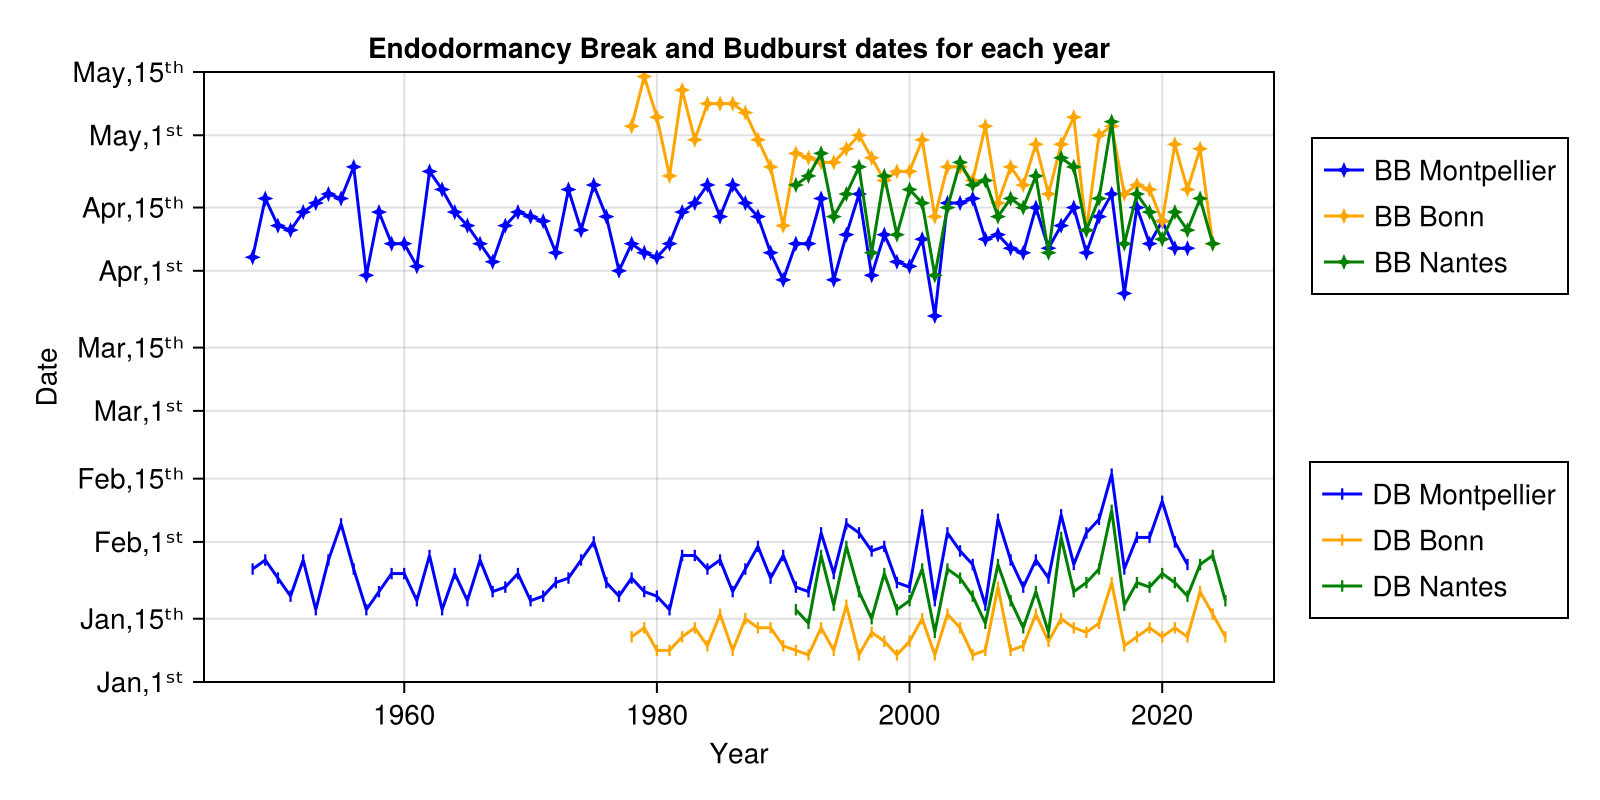

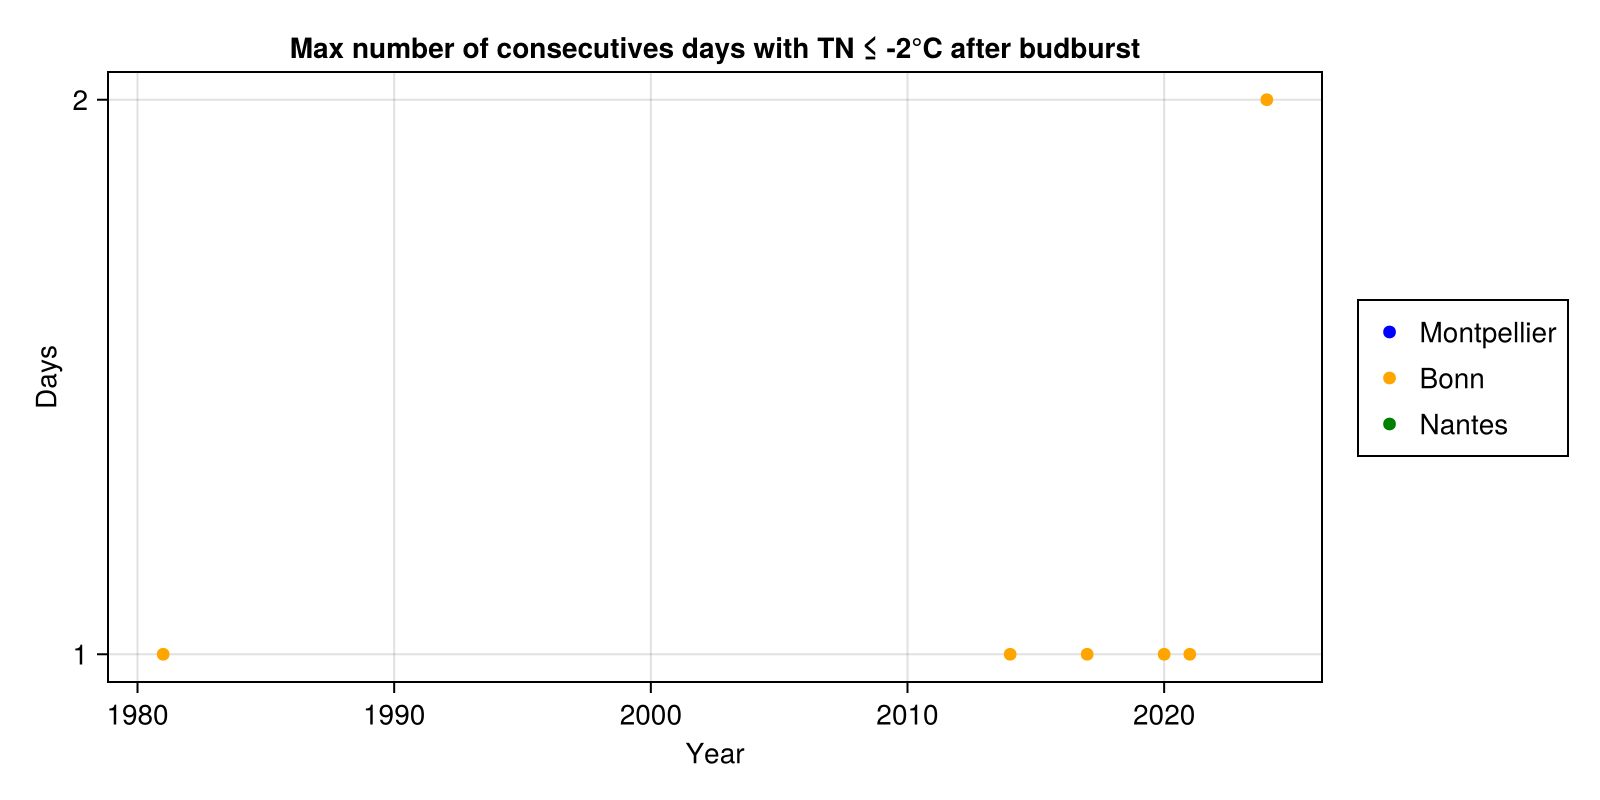

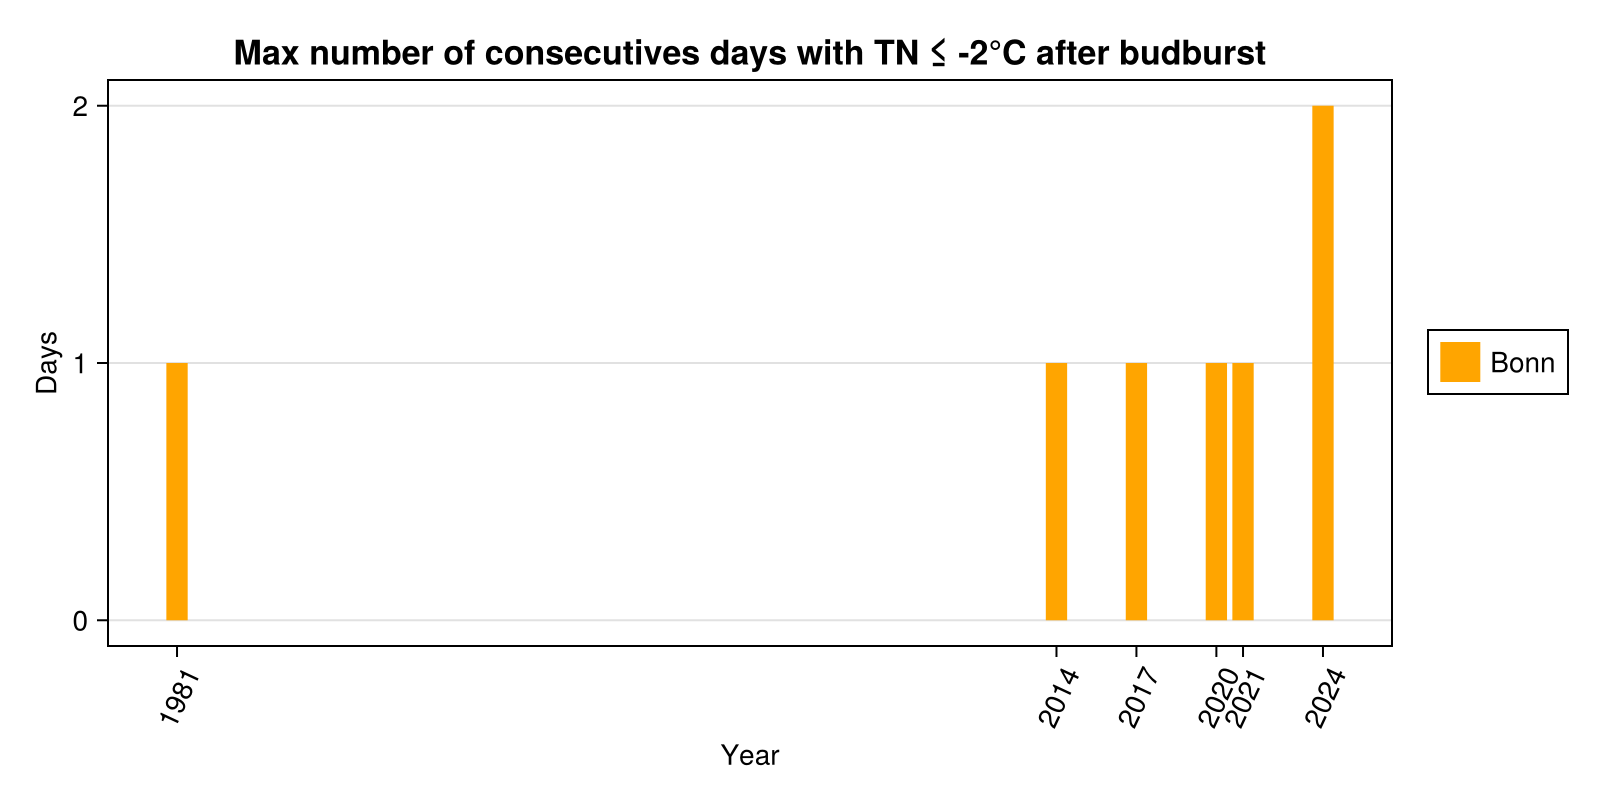

[1, 1, 1, 1, 1, 2]


CairoMakie.Screen{PDF}


In [ ]:
DB_Montpellier, BB_Montpellier = Apple_Phenology_Pred(initTG(commonpath * "TG_Montpellier.txt"))
DB_Bonn, BB_Bonn = Apple_Phenology_Pred(initTG(commonpath * "TG_Bonn.txt"))
DB_Nantes, BB_Nantes = Apple_Phenology_Pred(initTG(commonpath * "TG_Nantes.txt"))
DB_Forli, BB_Forli = Apple_Phenology_Pred(initTG(commonpath * "TG_Forli.txt"))

date_vecsBB = [BB_Montpellier, BB_Bonn, BB_Nantes]# BB_Forli]

colors = ["blue","orange","green"]#,"maroon"]

fig = Plot_Pheno_Dates_DB_BB([DB_Montpellier, DB_Bonn, DB_Nantes],# DB_Forli],
    date_vecsBB,
    (10, 30),
    DB_label=["DB Montpellier", "DB Bonn", "DB Nantes"],# "DB Forli"],
    BB_label=["BB Montpellier", "BB Bonn", "BB Nantes"],# "DB Forli"],
    DB_colors = colors,
    BB_colors = colors
    )
save("Presentation/Apple_pheno.pdf",fig,; px_per_unit=2.0)
display(fig)

label = ["Montpellier", "Bonn", "Nantes"]

fig = Plot_Freeze_Risk(TN_vecs, dates_vecs_TN, date_vecsBB,
    colors=colors,
    label=label)
    
display(fig)

fig = Plot_Freeze_Risk_Bar(TN_temp_Bonn, BB_Bonn,
    color="orange",
    label="Bonn")
    
display(fig)
save("Presentation/Freeze_Risk.pdf", fig, ; px_per_unit=2.0)

## Vine phenology model

Endodormancy break date :
$n_{db} = Inf \{ D, \sum_{d = CPO}^D R_c(\theta_d) > Cc \} $  
Budbirst date :
$n_{bb} = Inf \{ D, \sum_{d = n_{db}}^D R_f(\theta_d) > Ghc \} $  
$Cc$, $Ghc$ : Chilling and heating quantity required  
$\theta_d$ : Temperature (TG) at day d  

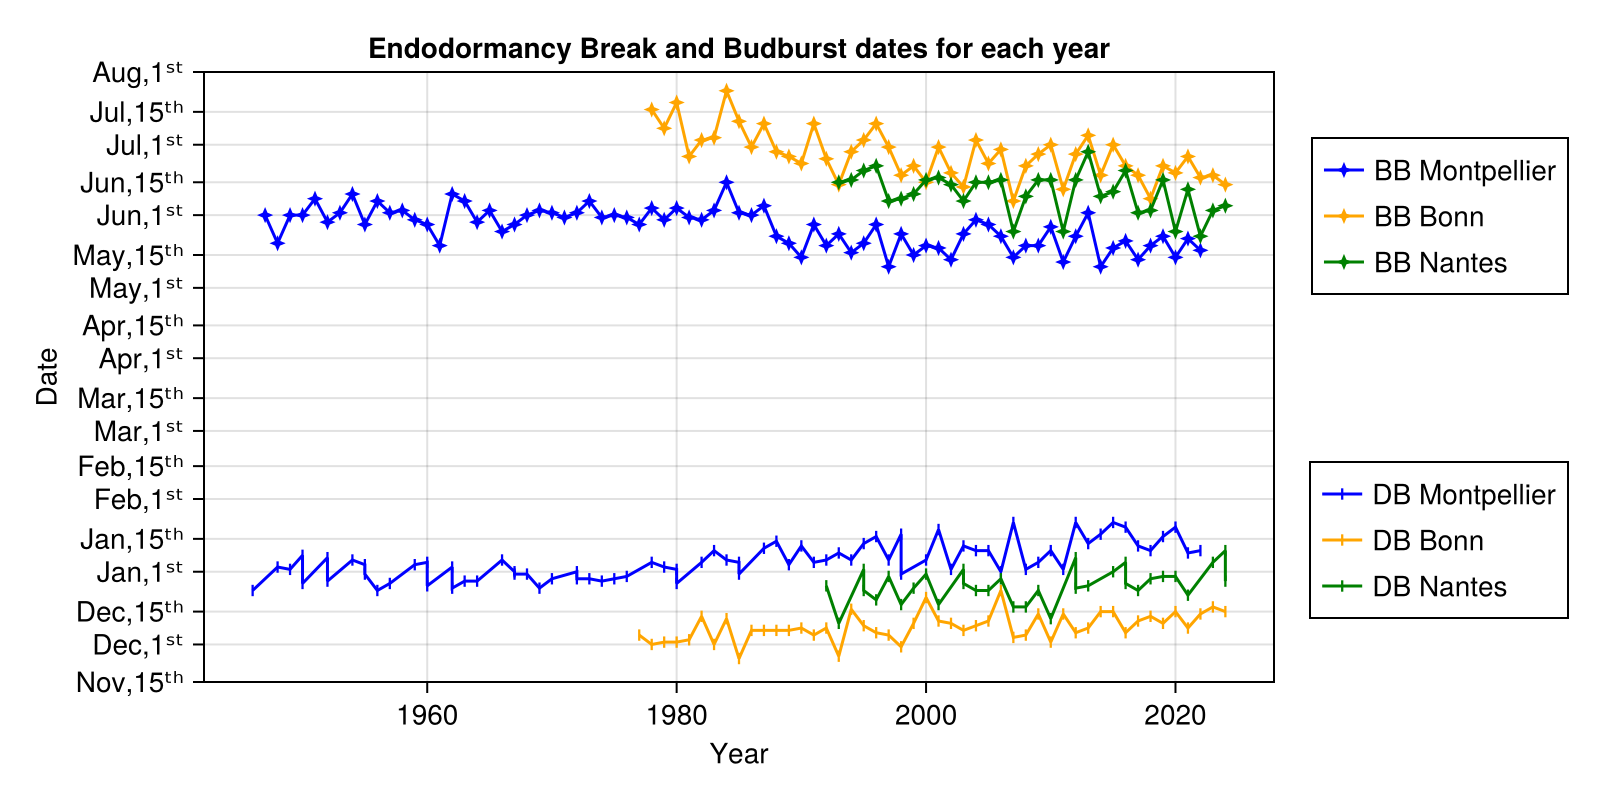

5

In [ ]:
DB_Montpellier, BB_Montpellier = Vine_Phenology_Pred(commonpath * "TN_Montpellier.txt", commonpath * "TX_Montpellier.txt")
DB_Bonn, BB_Bonn = Vine_Phenology_Pred(commonpath * "TN_Bonn.txt", commonpath * "TX_Bonn.txt")
DB_Nantes, BB_Nantes = Vine_Phenology_Pred(commonpath * "TN_Nantes.txt", commonpath * "TX_Nantes.txt")
# DB_Forli, BB_Forli = Vine_Phenology_Pred(commonpath * "TN_Forli.txt", commonpath * "TX_Forli.txt")

date_vecsBB = [BB_Montpellier, BB_Bonn, BB_Nantes]# BB_Forli]

colors = ["blue","orange","green"]#,"maroon"]

fig = Plot_Pheno_Dates_DB_BB([DB_Montpellier, DB_Bonn, DB_Nantes],# DB_Forli],
    date_vecsBB,# BB_Forli],
    (8, 1),
    DB_label=["DB Montpellier", "DB Bonn", "DB Nantes"],# "DB Forli"],
    BB_label=["BB Montpellier", "BB Bonn", "BB Nantes"],# "BB Forli"],
    DB_colors = colors,
    BB_colors = colors
    )
save("Presentation/Gvine_pheno.pdf", fig, ; px_per_unit=2.0)
display(fig)

date_vecsBB = [BB_Montpellier, BB_Bonn, BB_Nantes]
label = ["Montpellier", "Bonn", "Nantes"]

fig = Plot_Freeze_Risk(TN_vecs, dates_vecs_TN, date_vecsBB,
    colors=colors,
    label=label)
    
display(fig)

## Generated data on apple model

Phenology of apple with generated data from a model trained on Montpellier records

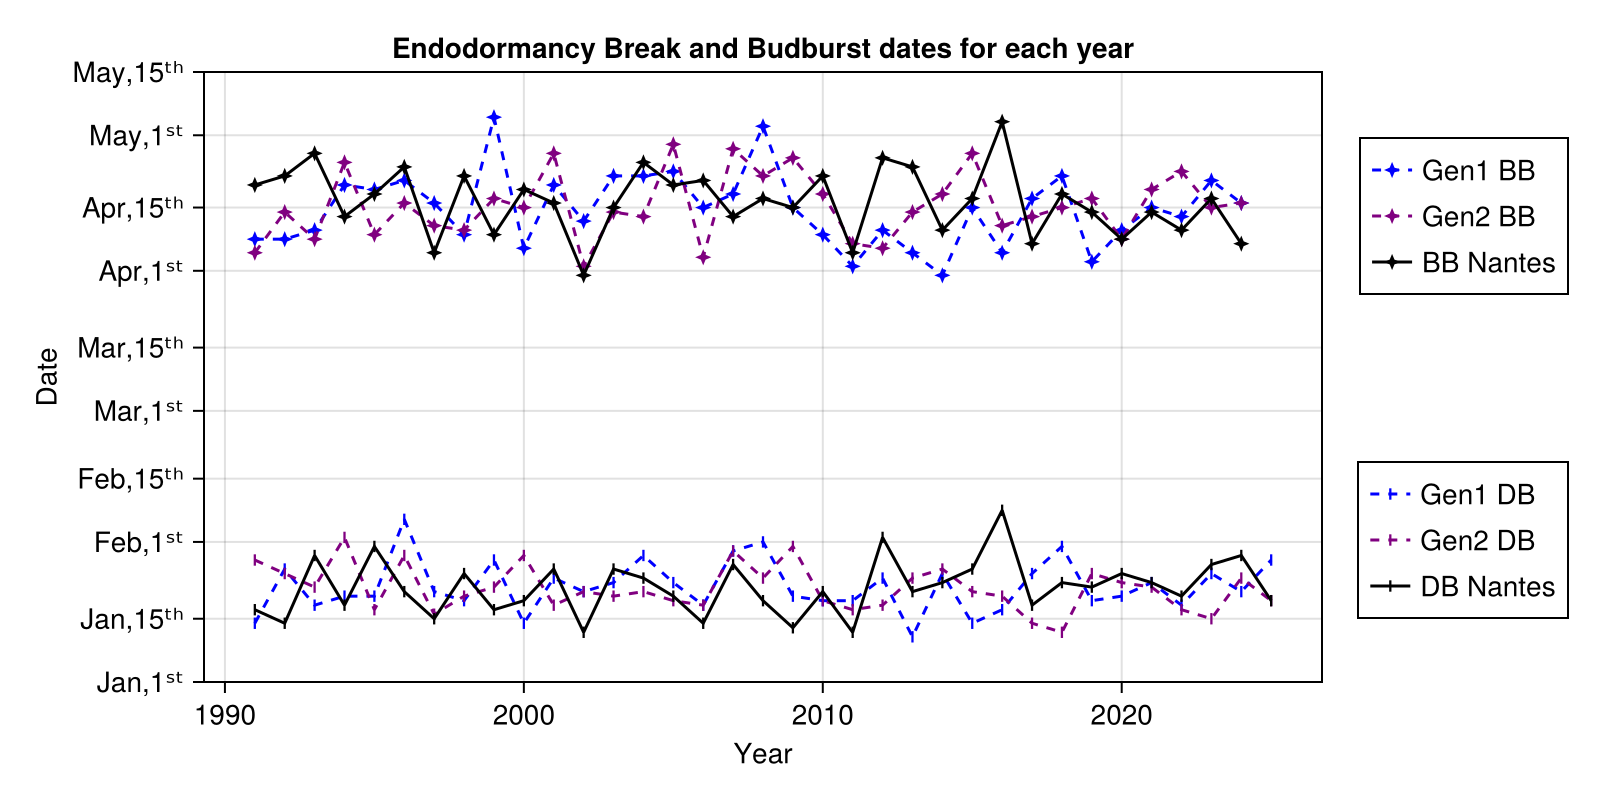

CairoMakie.Screen{IMAGE}


In [16]:
include("../AR/utils/Structure.jl")
include("PhenoPred.jl")
cd(@__DIR__)
series = extract_series(commonpath * "TG_Nantes.txt", type_data="TG")
series = truncate_MV(series, "TG")
x, date_vec = (series[!, 2], series.DATE)

ARmodel = fit_MonthlyAR(x, date_vec)
x_vec = rand(ARmodel, date_vec, 2)

DB_Nantes, BB_Nantes = Apple_Phenology_Pred(x, date_vec)
Tab = [Apple_Phenology_Pred(x_hat, date_vec) for x_hat in x_vec] |> stack

colors = ["blue", "purple", "black"]
fig  = Plot_Pheno_Dates_DB_BB([Tab[1, :]; [DB_Nantes]],
[Tab[2, :]; [BB_Nantes]],
(10, 30),
DB_label=[["Gen$(i) DB" for i in 1:2]; "DB Nantes"],
DB_colors=colors,
BB_label=[["Gen$(i) BB" for i in 1:2]; "BB Nantes"],
BB_colors=colors,
dashindexes=[1,2])
save("Presentation/3phenos.pdf",fig,; px_per_unit=2.0)
display(fig)

Montpellier

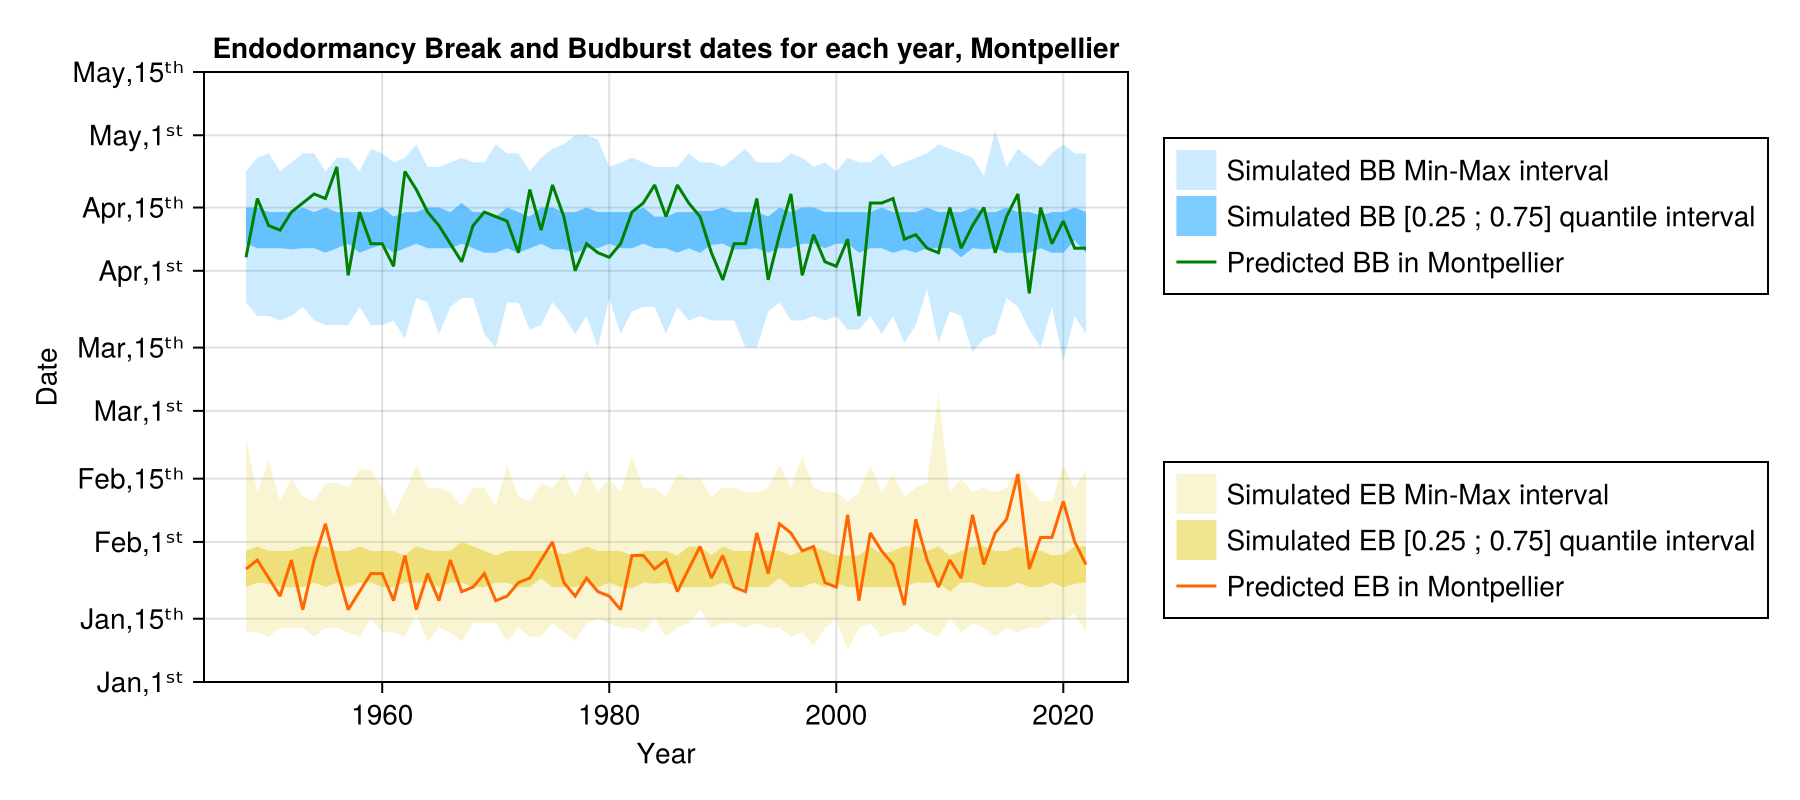

CairoMakie.Screen{PDF}


In [17]:
include("PhenoPred.jl")
cd(@__DIR__)
series = extract_series(commonpath * "TG_Montpellier.txt", type_data="TG")
series = truncate_MV(series, "TG")
x, date_vec = (series[!, 2], series.DATE)
DB_Montpellier, BB_Montpellier = Apple_Phenology_Pred(x, date_vec)

ARmodel = fit_MonthlyAR(x, date_vec)
x_vec = rand(ARmodel, date_vec, 200)

Tab = [Apple_Phenology_Pred(x_hat, date_vec) for x_hat in x_vec] |> stack
Set_DB = Tab[1, :]
Set_BB = Tab[2, :]

fig = Plot_Pheno_Dates_DB_BB(DB_Montpellier, BB_Montpellier, (10, 30),
    sample_DB=Set_DB,
    sample_BB=Set_BB,
    station_name="Montpellier"
)
display(fig)
save("Presentation/Montpellier_sim.pdf", fig, ; px_per_unit=2.0)

Bonn

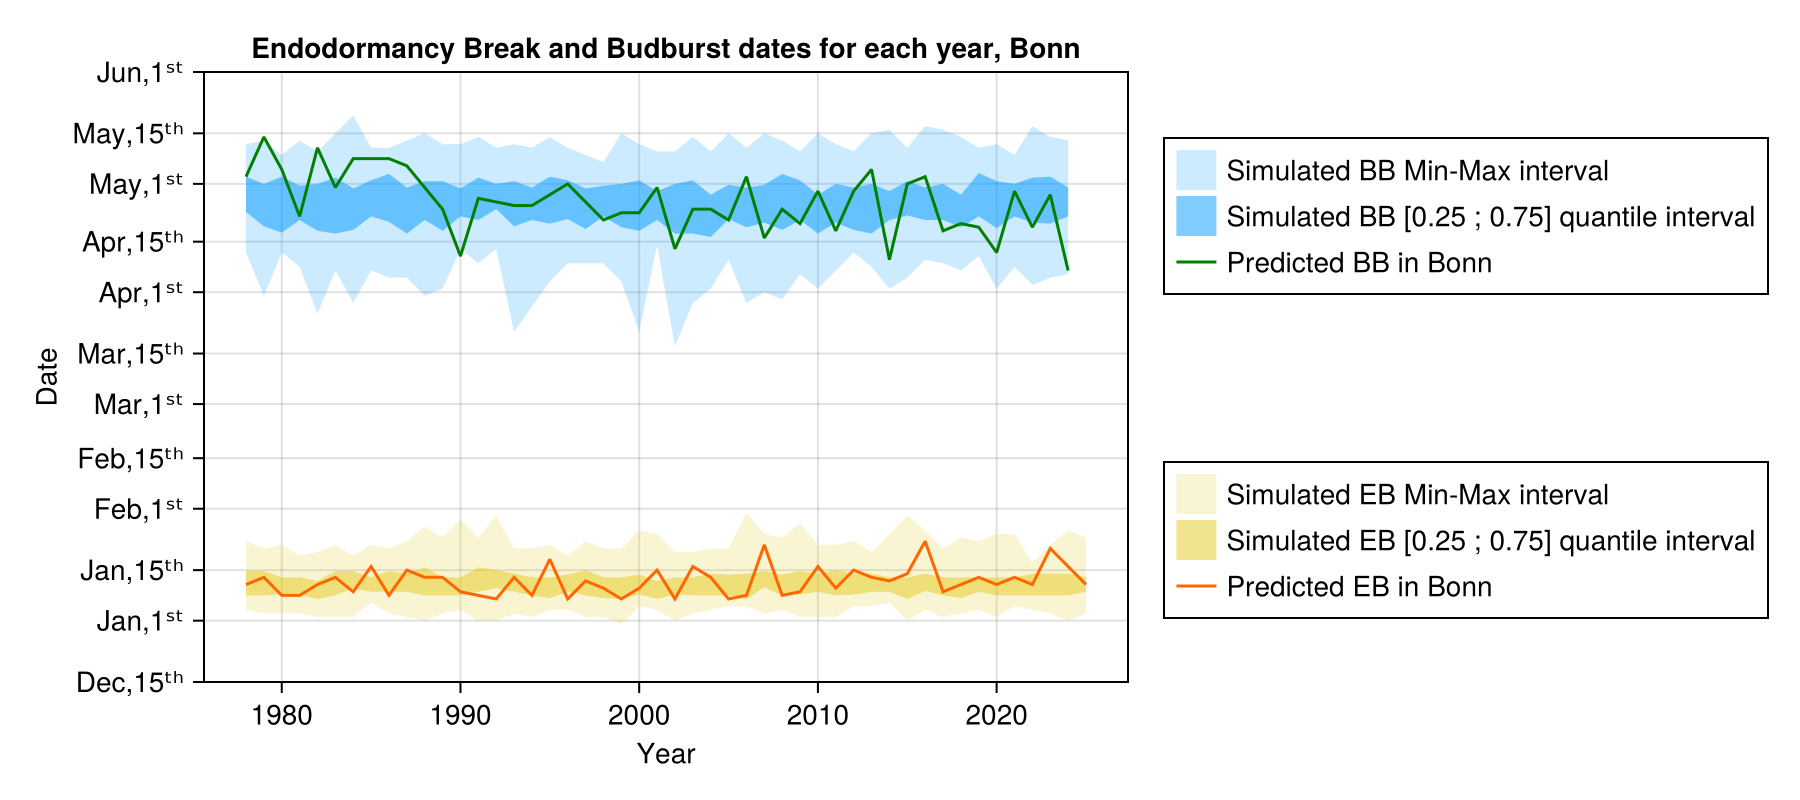

CairoMakie.Screen{PDF}


In [18]:
include("PhenoPred.jl")
cd(@__DIR__)
series = extract_series(commonpath * "TG_Bonn.txt", type_data="TG")
series = truncate_MV(series, "TG")
x, date_vec = (series[!, 2], series.DATE)
DB_Bonn, BB_Bonn = Apple_Phenology_Pred(x, date_vec)

ARmodel = fit_MonthlyAR(x, date_vec)
x_vec = rand(ARmodel, date_vec, 50)

Tab = [Apple_Phenology_Pred(x_hat, date_vec) for x_hat in x_vec] |> stack
Set_DB = Tab[1, :]
Set_BB = Tab[2, :]

fig = Plot_Pheno_Dates_DB_BB(DB_Bonn, BB_Bonn, (10, 30),
    sample_DB=Set_DB,
    sample_BB=Set_BB,
    station_name = "Bonn"
)
display(fig)
save("Presentation/Bonn_sim.pdf",fig,; px_per_unit=2.0)

Nantes

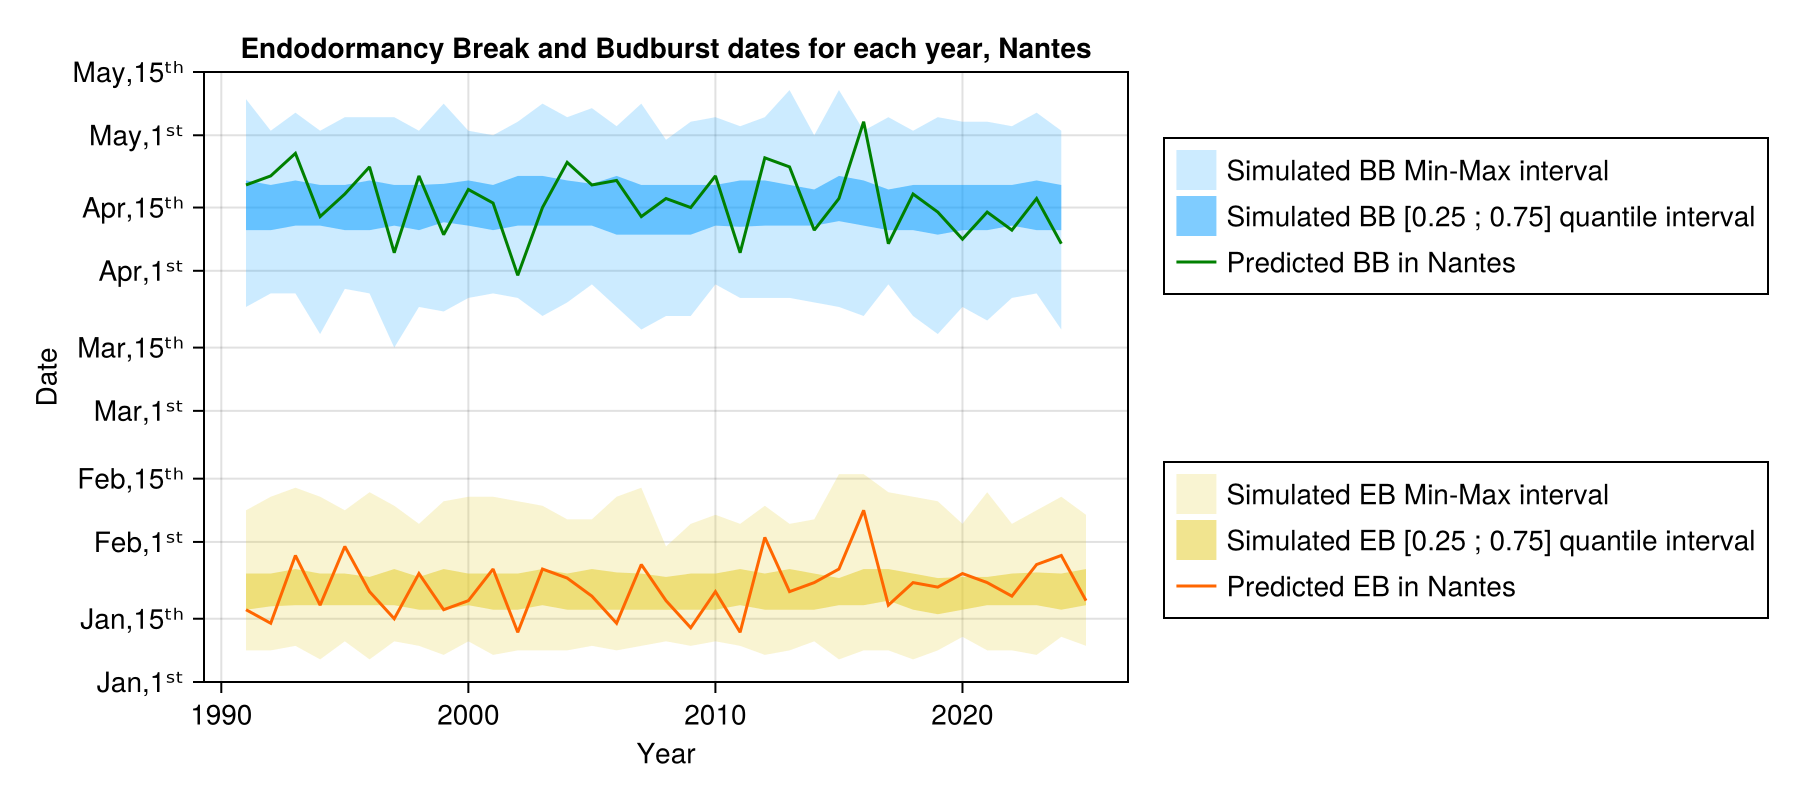

CairoMakie.Screen{PDF}


In [19]:
series = extract_series(commonpath * "TG_Nantes.txt", type_data="TG")
series = truncate_MV(series, "TG")
x, date_vec = (series[!, 2], series.DATE)
DB_Nantes, BB_Nantes = Apple_Phenology_Pred(x, date_vec)

ARmodel = fit_MonthlyAR(x, date_vec)
x_vec = rand(ARmodel, date_vec, 200)

Tab = [Apple_Phenology_Pred(x_hat, date_vec) for x_hat in x_vec] |> stack
Set_DB = Tab[1, :]
Set_BB = Tab[2, :]

fig = Plot_Pheno_Dates_DB_BB(DB_Nantes, BB_Nantes, (10, 30),
    sample_DB=Set_DB,
    sample_BB=Set_BB,
    station_name = "Nantes"
)
display(fig)
save("Presentation/Nantes_sim.pdf", fig ; px_per_unit=2.0)

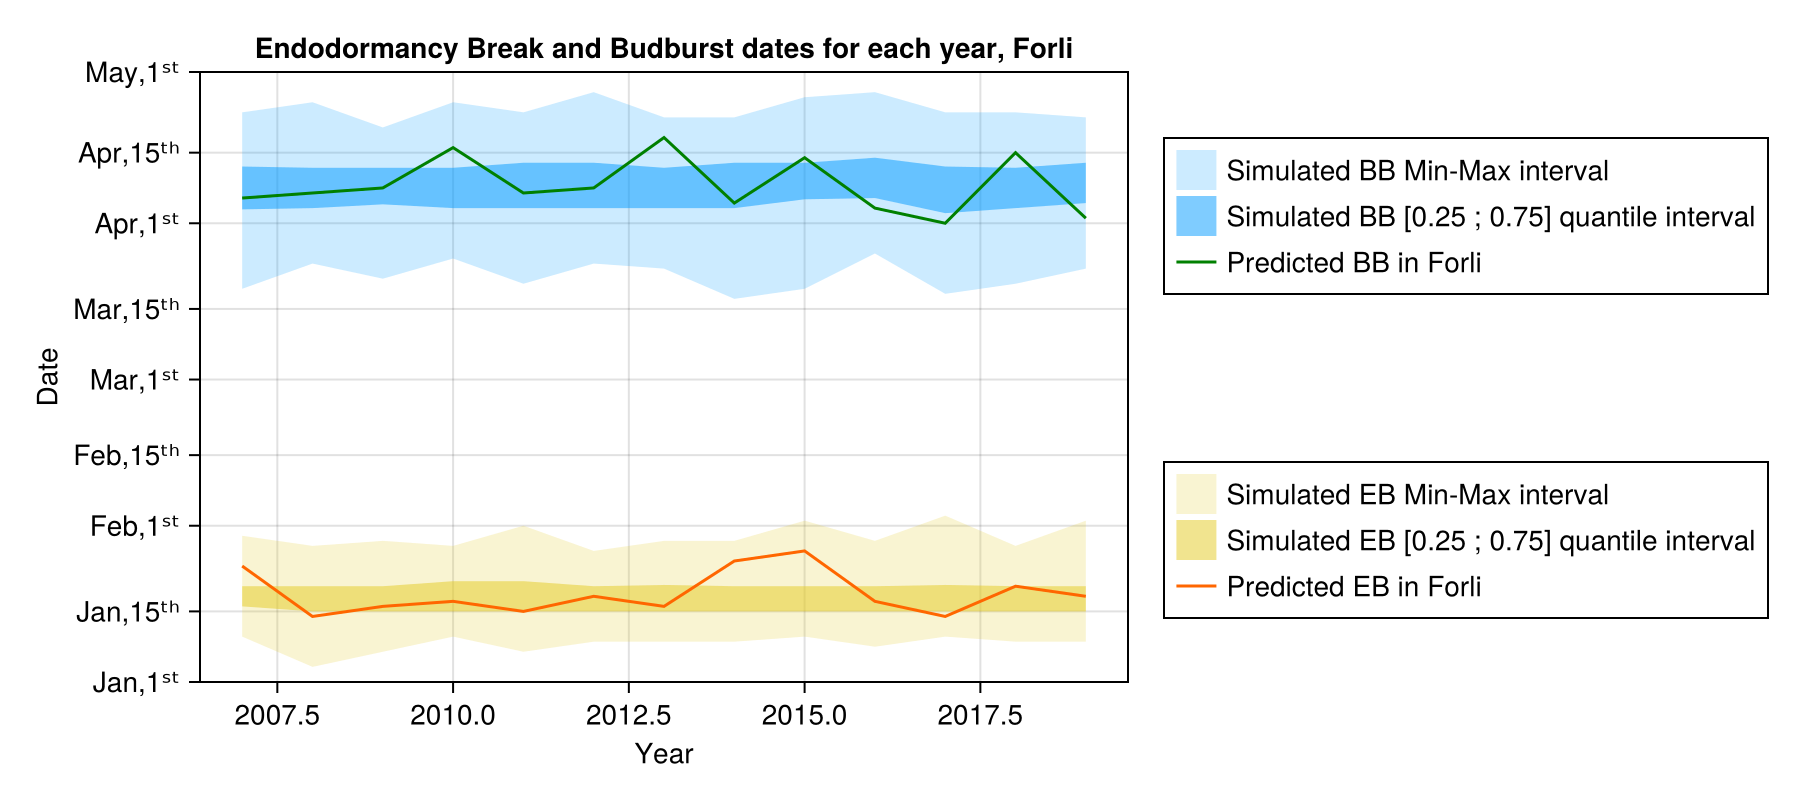

CairoMakie.Screen{PDF}


In [ ]:
# series = extract_series(commonpath * "TG_Forli.txt", type_data="TG")
# series = truncate_MV(series, "TG")
# x, date_vec = (series[!, 2], series.DATE)
# DB_Forli, BB_Forli = Apple_Phenology_Pred(x, date_vec)

# ARmodel = fit_MonthlyAR(x, date_vec)
# x_vec = rand(ARmodel, date_vec, 200)

# Tab = [Apple_Phenology_Pred(x_hat, date_vec) for x_hat in x_vec] |> stack
# Set_DB = Tab[1, :]
# Set_BB = Tab[2, :]

# fig = Plot_Pheno_Dates_DB_BB(DB_Forli, BB_Forli, (10, 30),
#     sample_DB=Set_DB,
#     sample_BB=Set_BB,
#     station_name = "Forli"
# )
# display(fig)
# save("Presentation/Forli_sim.pdf", fig ; px_per_unit=2.0)